In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
Bike_details = pd.read_csv(r"C:\Users\shrey\Downloads\BIKE DETAILS.csv")

In [3]:
# Check if the dataset is imported 
Bike_details.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
# 1. Remove duplicate rows
Bike_details.drop_duplicates(inplace=True)

In [5]:
# 2. Check for missing values
print("\n--- Missing Values in Each Column ---\n")
print(Bike_details.isnull().sum())


--- Missing Values in Each Column ---

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    433
dtype: int64


In [6]:
# 3. Fill missing ex_showroom_price with median
Bike_details['ex_showroom_price'].fillna(Bike_details['ex_showroom_price'].median(), inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_19408\2671645295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Bike_details['ex_showroom_price'].fillna(Bike_details['ex_showroom_price'].median(), inplace=True)


In [7]:
print("\n--- Missing Values in Each Column ---\n")
print(Bike_details.isnull().sum())


--- Missing Values in Each Column ---

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [8]:
# 4. Clean column names
Bike_details.columns = Bike_details.columns.str.strip()

In [9]:
# 5. Convert columns to appropriate data types
Bike_details['selling_price'] = pd.to_numeric(Bike_details['selling_price'], errors='coerce')
Bike_details['km_driven'] = pd.to_numeric(Bike_details['km_driven'], errors='coerce')
Bike_details['year'] = pd.to_numeric(Bike_details['year'], errors='coerce')


In [10]:
Bike_details.dropna(subset=['selling_price', 'km_driven', 'year'], inplace=True)


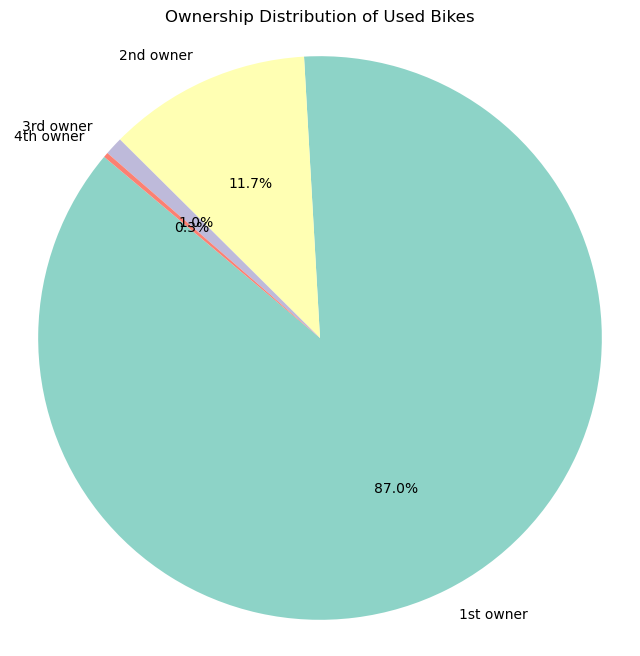

In [11]:
import matplotlib.pyplot as plt

# Count ownership categories
owner_counts = Bike_details['owner'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Ownership Distribution of Used Bikes')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_19408\4048138562.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_counts.index, y=price_counts.values, palette='pastel')


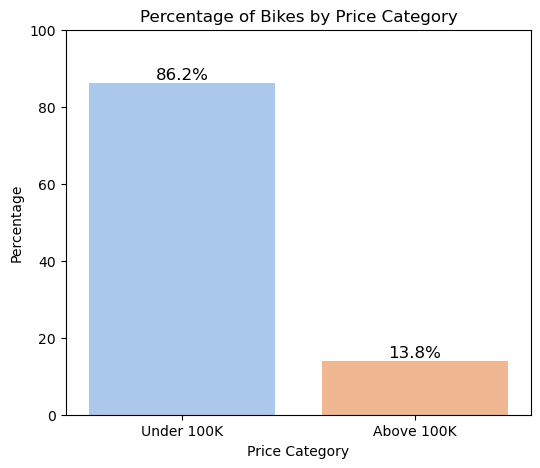

In [12]:
# Create a new column to categorize bikes by price
Bike_details['price_category'] = Bike_details['selling_price'].apply(lambda x: 'Under 100K' if x <= 100000 else 'Above 100K')

# Calculate value counts and convert to percentages
price_counts = Bike_details['price_category'].value_counts(normalize=True) * 100

# Bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x=price_counts.index, y=price_counts.values, palette='pastel')
plt.title('Percentage of Bikes by Price Category')
plt.ylabel('Percentage')
plt.xlabel('Price Category')
plt.ylim(0, 100)

# Add data labels on top of bars
for index, value in enumerate(price_counts.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.show()


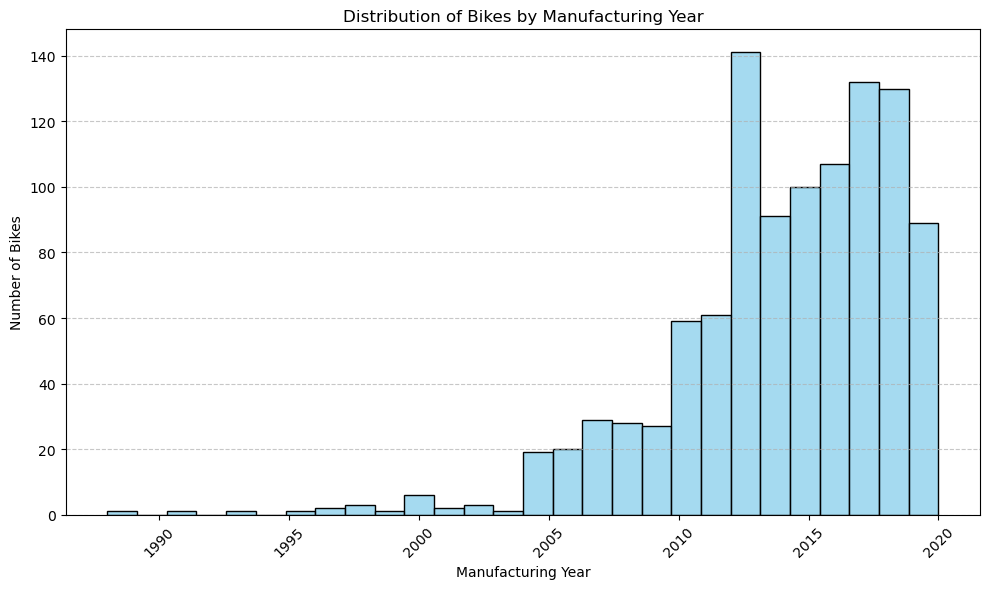

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(Bike_details['year'], bins=len(Bike_details['year'].unique()), kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Bikes by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


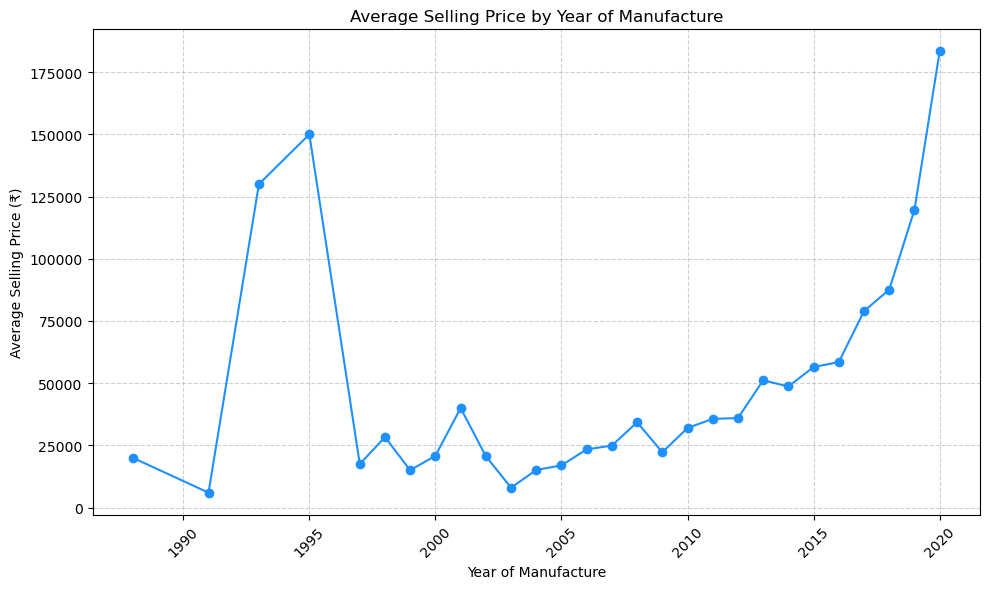

In [14]:
# Group by year and calculate average selling price
avg_price_by_year = Bike_details.groupby('year')['selling_price'].mean().sort_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='dodgerblue')
plt.title('Average Selling Price by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price (₹)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_19408\908392492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='owner', y='selling_price', data=Bike_details, palette='Set3')


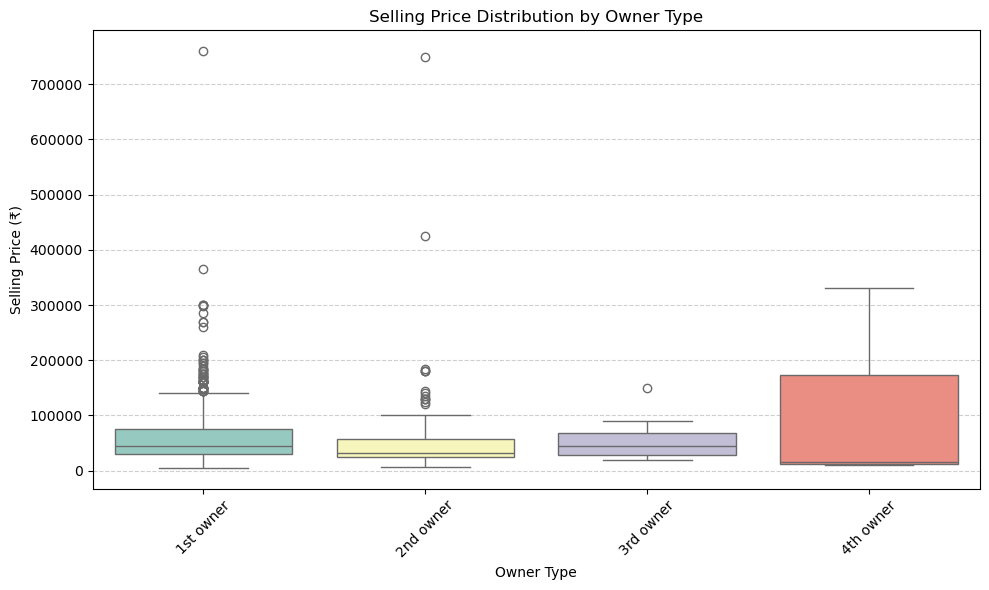

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=Bike_details, palette='Set3')

plt.title('Selling Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
